In [1]:
%load_ext autoreload
%autoreload 2

## Load Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import seaborn as sns
import os
os.chdir('..')
import torch
import numpy as np
from src.model import predict

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
# set plotting style
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 200
fig_size = (8, 4)

## Load Experimental Data

In [4]:
data = pd.read_csv('../data/cleaned_data.csv')
data.drop(columns=['S/N', 'C2H4', 'CO', 'H2', 'EtoH', 'FORM'], inplace=True)
data.head()

,cDen,Pot,Sn %,pH,weight,Cu %
0,150,3.5,1.00,14.05,118.7100,0.00
1,150,3.3,0.80,14.05,107.6772,0.20
2,150,3.2,0.50,14.05,91.1280,0.50
3,150,3.1,0.10,14.05,69.0624,0.90
4,150,3.0,0.05,14.05,66.3042,0.95


In [5]:
output = pd.read_csv('../data/cleaned_data.csv')
output.drop(columns=['S/N'], inplace=True)
output.drop(columns=(list(data.columns)), inplace=True)
output.head()   

,C2H4,CO,H2,EtoH,FORM
0,0.00,0.23,0.12,0.00,0.61
1,0.00,0.23,0.07,0.00,0.66
2,0.00,0.34,0.05,0.03,0.52
3,0.01,0.42,0.05,0.02,0.42
4,0.04,0.48,0.05,0.10,0.19


In [6]:
# normalize the data with max values
data['Cu %'] /= 1.00
data['weight'] /= 118.71
data['Pot'] /= 4.70
data['pH'] /= 14.05
data['cDen'] /= 450.00

In [7]:
data.head()

,cDen,Pot,Sn %,pH,weight,Cu %
0,0.333333,0.744681,1.00,1.0,1.000000,0.00
1,0.333333,0.702128,0.80,1.0,0.907061,0.20
2,0.333333,0.680851,0.50,1.0,0.767652,0.50
3,0.333333,0.659574,0.10,1.0,0.581774,0.90
4,0.333333,0.638298,0.05,1.0,0.558539,0.95


In [8]:
# rerrange the columns
data = data[['Sn %', 'Pot', 'weight', 'pH', 'Cu %', 'cDen']]
data.head()

,Sn %,Pot,weight,pH,Cu %,cDen
0,1.00,0.744681,1.000000,1.0,0.00,0.333333
1,0.80,0.702128,0.907061,1.0,0.20,0.333333
2,0.50,0.680851,0.767652,1.0,0.50,0.333333
3,0.10,0.659574,0.581774,1.0,0.90,0.333333
4,0.05,0.638298,0.558539,1.0,0.95,0.333333


## Perform Shap Analysis

### 1. HCOOH

In [9]:
def f_instance(df):
    input_df = np.asarray(df)
    input = torch.from_numpy(input_df).float()
    out = predict(input, layer_model=[6, 20, 20, 15, 3], dir='./feh/')[:, 0]

    return out

explainer = shap.Explainer(f_instance, data)
shap_values = explainer(data)

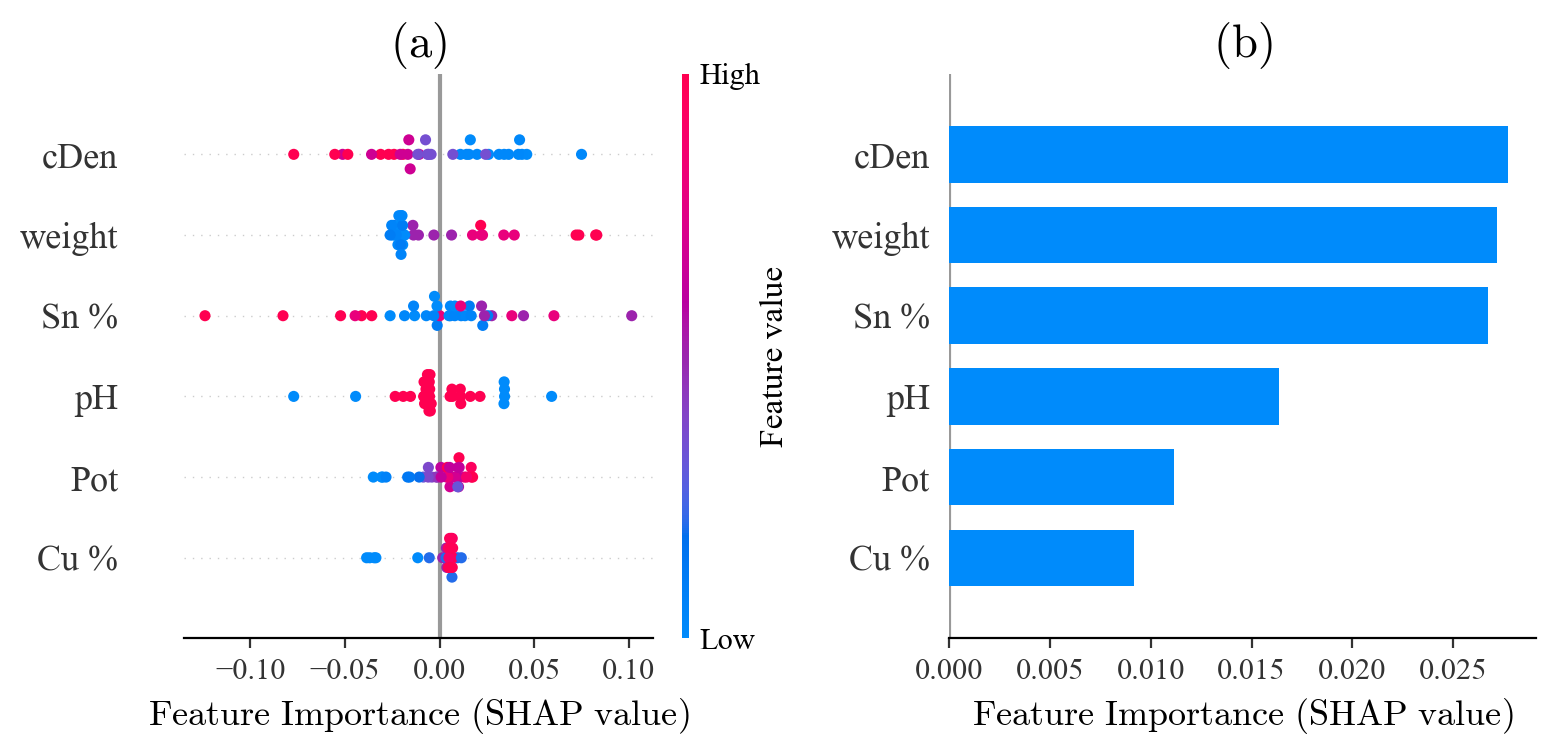

In [10]:
fig1x = plt.figure()

ax1x0 = fig1x.add_subplot(121)
shap.summary_plot(shap_values, features=data, show=False,)
ax1x0.set_xlabel(r'$\rm Feature\ Importance \ (SHAP \ value)$')
ax1x0.set_title(r'$\rm (a)$')

ax1x1 = fig1x.add_subplot(122)
shap.summary_plot(shap_values, features=data, show=False, plot_type='bar')
ax1x1.set_xlabel(r'$\rm Feature\ Importance \ (SHAP \ value)$')
ax1x1.set_title(r'$\rm (b)$')

plt.gcf().set_size_inches(fig_size)
plt.tight_layout()
plt.show()

In [11]:
idx_max, idx_min = np.argmax(output['FORM']), np.argmin(output['FORM'])
print(f"Min: {output['FORM'].iloc[idx_min]*100}%, Max: {output['FORM'].iloc[idx_max]*100}%")

Min: 7.000000000000001%, Max: 70.0%


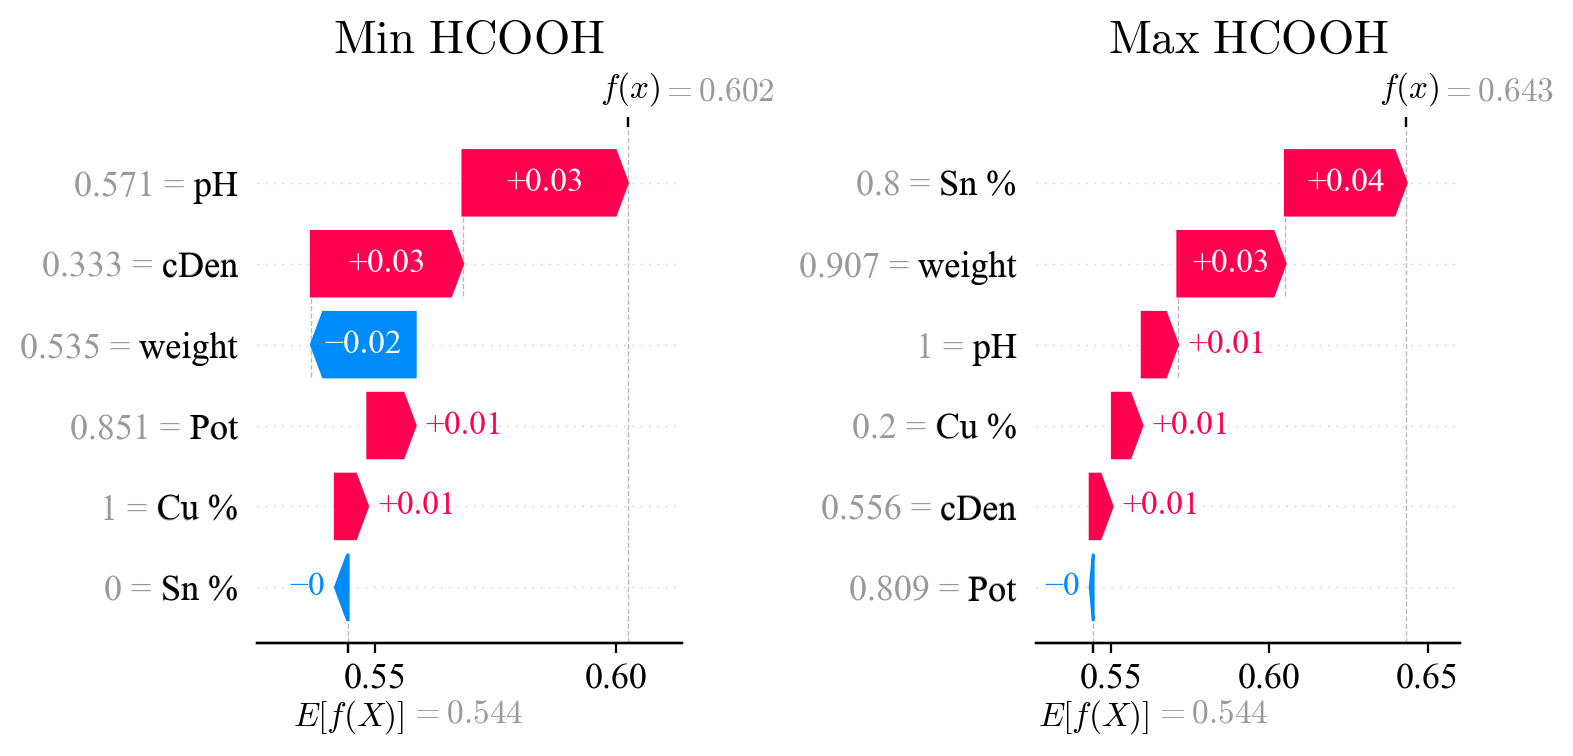

In [12]:
fig = plt.figure()

ax0 = fig.add_subplot(121)
shap.plots.waterfall(shap_values[idx_min], show=False)
ax0.set_title(r'$\rm Min \ HCOOH$')

ax1 = fig.add_subplot(122)
shap.plots.waterfall(shap_values[idx_max], show=False)
ax1.set_title(r'$\rm Max \ HCOOH$')

plt.gcf().set_size_inches(fig_size)
plt.tight_layout()
plt.show()

### 2. C2H5OH

In [13]:
def f_instance_2(df):
    input_df = np.asarray(df)
    input = torch.from_numpy(input_df).float()
    out = predict(input, layer_model=[6, 20, 20, 15, 3], dir='./feh/')[:, 1]

    return out

explainer_2 = shap.Explainer(f_instance_2, data)
shap_values_2 = explainer_2(data)

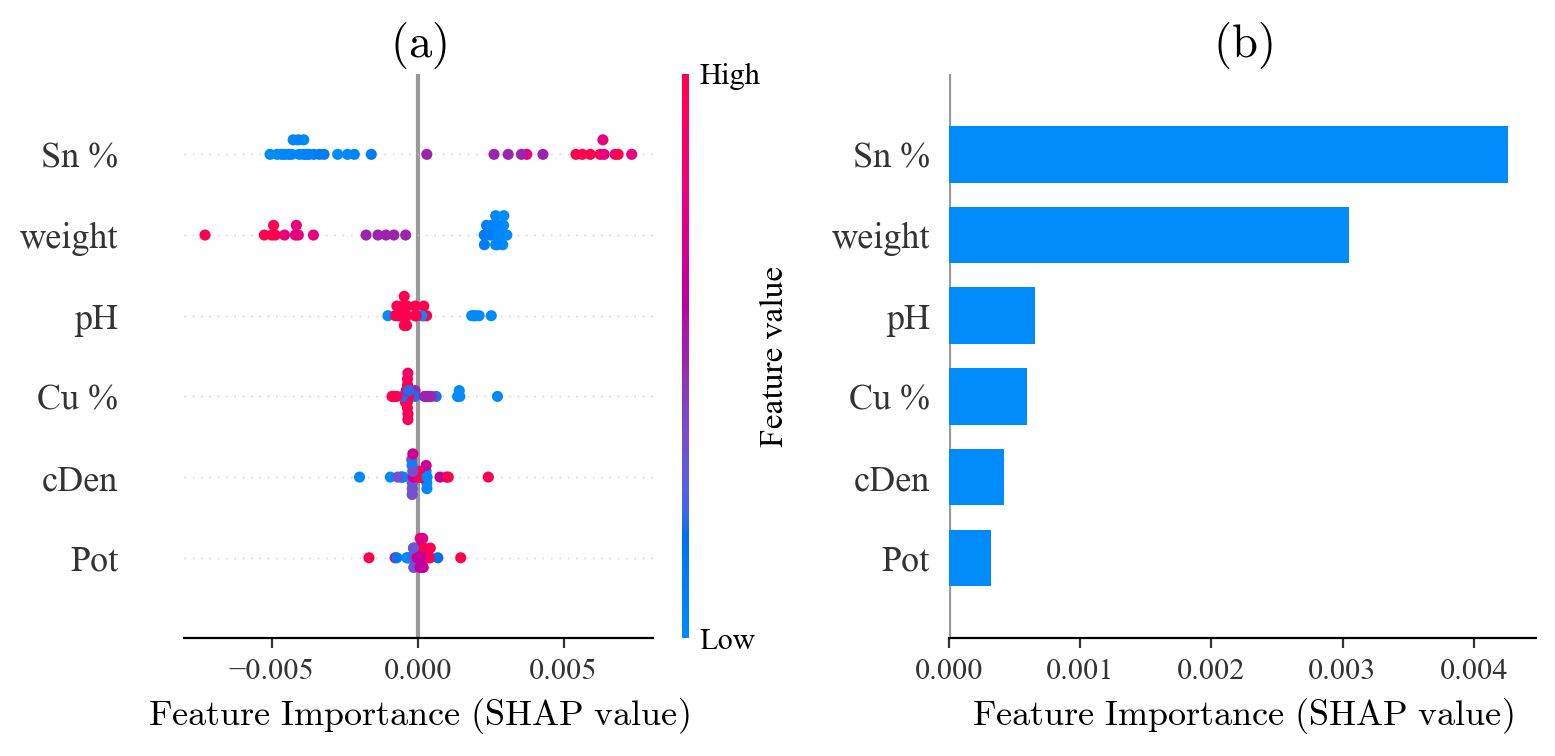

In [14]:
fig2x = plt.figure()

ax2x0 = fig2x.add_subplot(121)
shap.summary_plot(shap_values_2, features=data, show=False,)
ax2x0.set_xlabel(r'$\rm Feature\ Importance \ (SHAP \ value)$')
ax2x0.set_title(r'$\rm (a)$')


ax2x1 = fig2x.add_subplot(122)
shap.summary_plot(shap_values_2, features=data, show=False, plot_type='bar')
ax2x1.set_xlabel(r'$\rm Feature\ Importance \ (SHAP \ value)$')
ax2x1.set_title(r'$\rm (b)$')

plt.gcf().set_size_inches(fig_size)
plt.tight_layout()
plt.show()

In [15]:
idx_max, idx_min = np.argmax(output['EtoH']), np.argmin(output['EtoH'])
print(f"Min: {output['EtoH'].iloc[idx_min]*100}%, Max: {output['EtoH'].iloc[idx_max]*100}%")

Min: 0.0%, Max: 48.0%


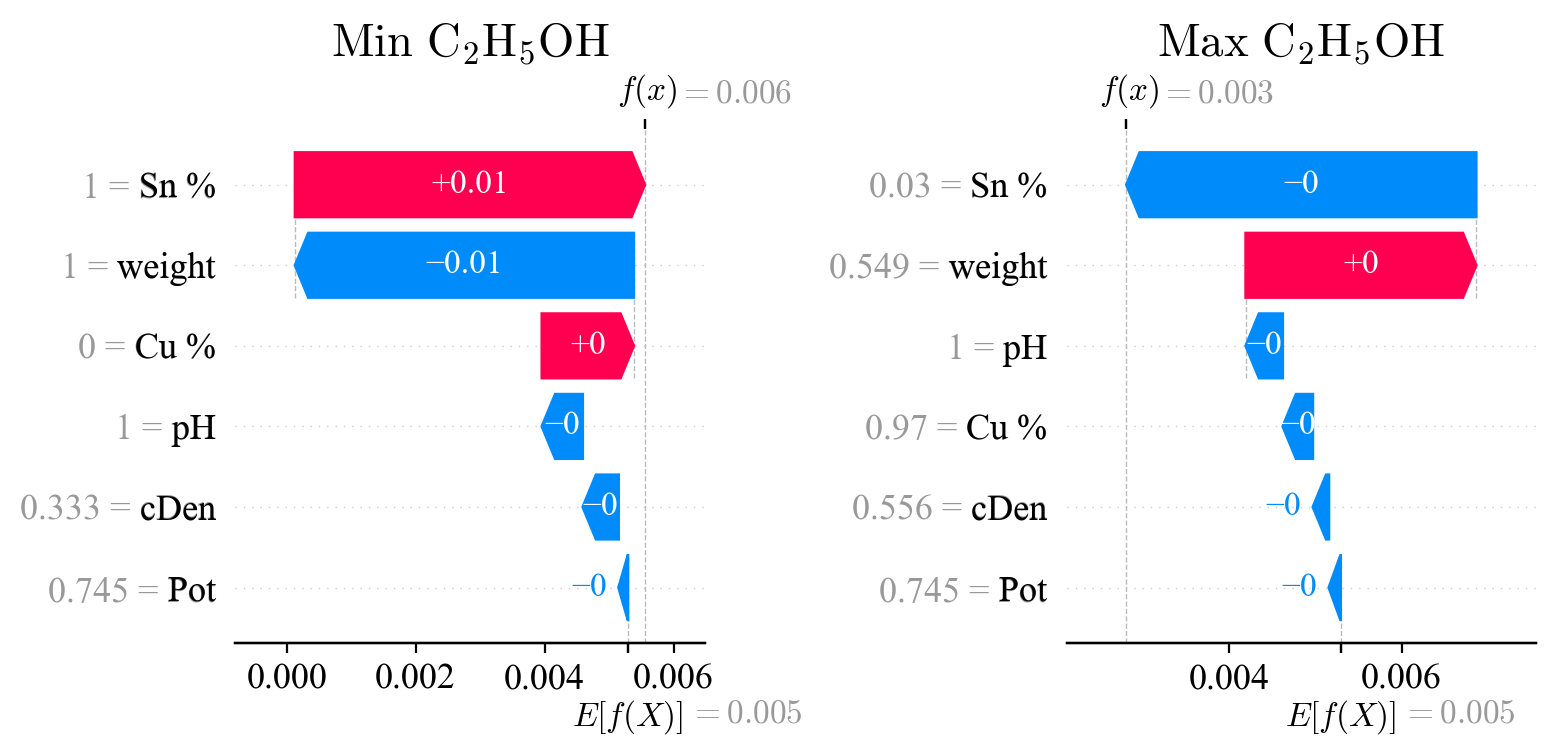

In [16]:
fig2 = plt.figure()

ax20 = fig2.add_subplot(121)
shap.plots.waterfall(shap_values_2[idx_min], show=False)
ax20.set_title(r'$\rm Min \ C_2H_5OH$')

ax21 = fig2.add_subplot(122)
shap.plots.waterfall(shap_values_2[idx_max], show=False)
ax21.set_title(r'$\rm Max \ C_2H_5OH$')

plt.gcf().set_size_inches(fig_size)
plt.tight_layout()
plt.show()

### 3. H2

In [17]:
def f_instance_3(df):
    input_df = np.asarray(df)
    input = torch.from_numpy(input_df).float()
    out = predict(input, layer_model=[6, 20, 20, 15, 3], dir='./feh/')[:, 2]

    return out

explainer_3 = shap.Explainer(f_instance_3, data)
shap_values_3 = explainer_3(data)

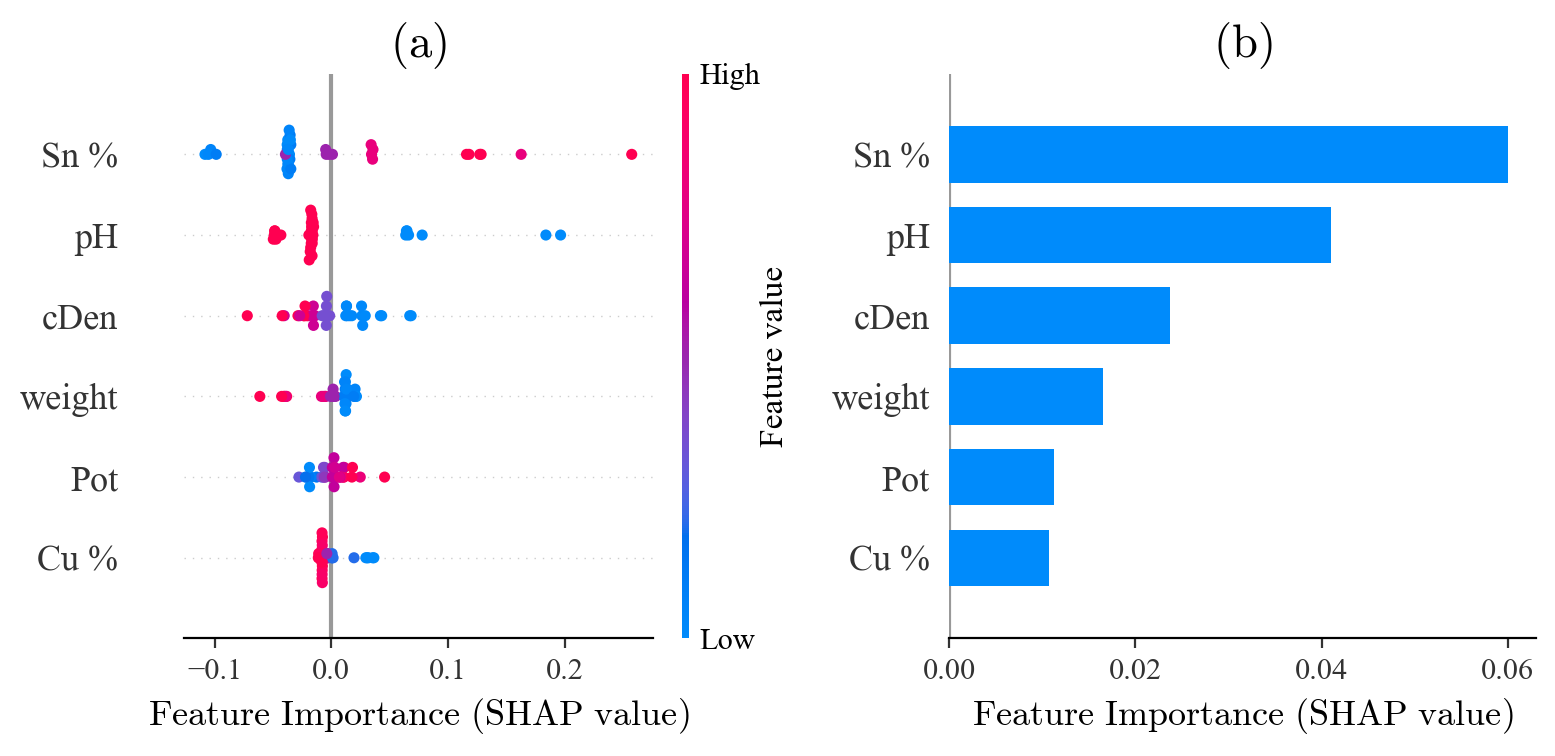

In [18]:
fig3x = plt.figure()

ax3x0 = fig3x.add_subplot(121)
shap.summary_plot(shap_values_3, features=data, show=False,)
ax3x0.set_xlabel(r'$\rm Feature\ Importance \ (SHAP \ value)$')
ax3x0.set_title(r'$\rm (a)$')

ax3x1 = fig3x.add_subplot(122)
shap.summary_plot(shap_values_3, features=data, show=False, plot_type='bar')
ax3x1.set_xlabel(r'$\rm Feature\ Importance \ (SHAP \ value)$')
ax3x1.set_title(r'$\rm (b)$')

plt.gcf().set_size_inches(fig_size)
plt.tight_layout()
plt.show()

In [19]:
idx_max, idx_min = np.argmax(output['H2']), np.argmin(output['H2'])
print(f"Min: {output['H2'].iloc[idx_min]*100}%, Max: {output['H2'].iloc[idx_max]*100}%")

Min: 5.0%, Max: 37.0%


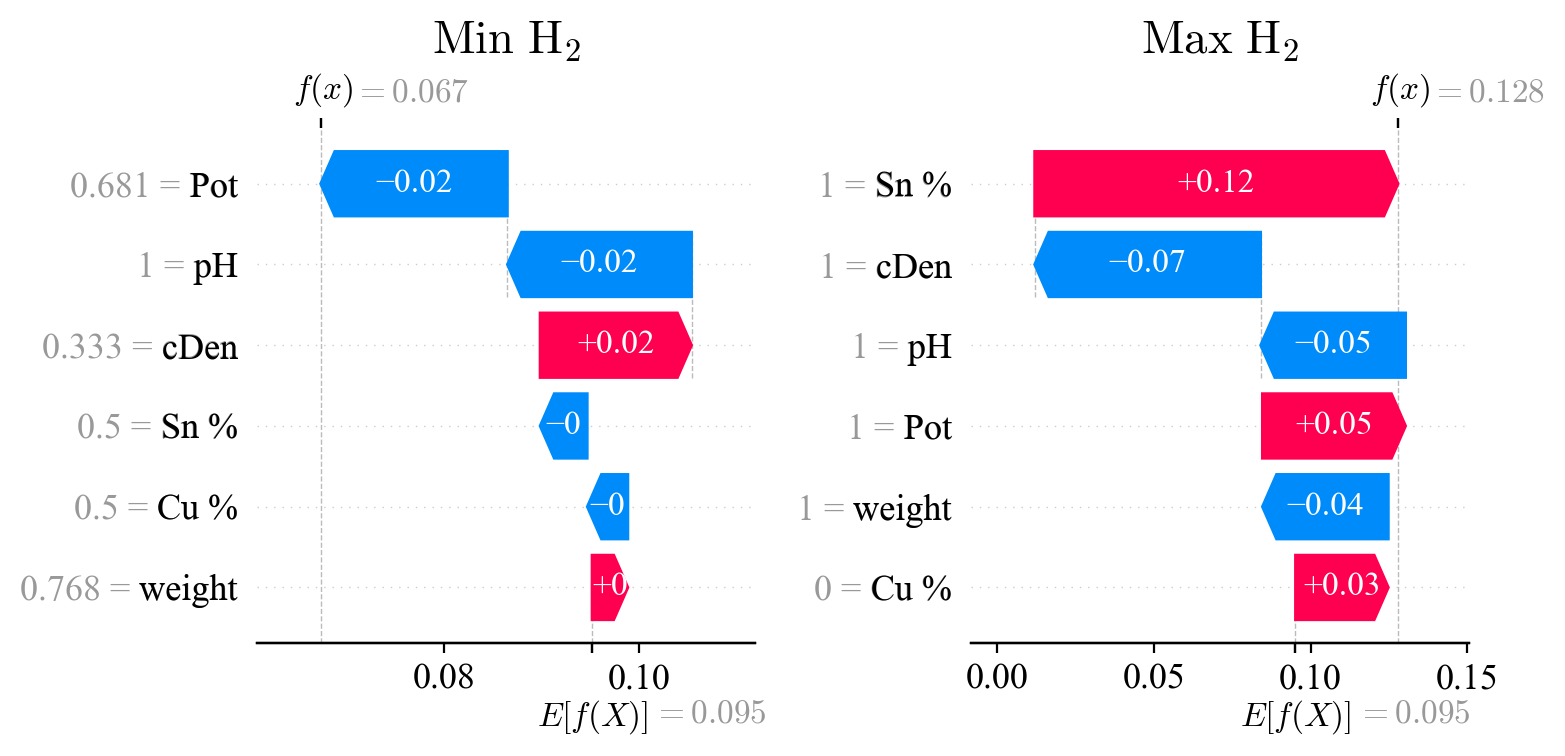

In [20]:
fig3 = plt.figure()

ax30 = fig3.add_subplot(121)
shap.plots.waterfall(shap_values_3[idx_min], show=False)
ax30.set_title(r'$\rm Min \ H_2$')

ax31 = fig3.add_subplot(122)
shap.plots.waterfall(shap_values_3[idx_max], show=False)
ax31.set_title(r'$\rm Max \ H_2$')

plt.gcf().set_size_inches(fig_size)
plt.tight_layout()
plt.show()